In [1]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [7]:
max([max(sequence) for sequence in train_data])

9999

In [8]:
word_index = imdb.get_word_index()

In [10]:
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])

In [19]:
decoded_review = ' '.join(
[reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [20]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [22]:
def vectorize_sequences(sequences, dimension=10000):
    results=np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] =1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [23]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [24]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [25]:
model.compile(optimizer = 'rmsprop', 
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [26]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss = 'binary_crossentropy', 
             metrics = ['accuracy'])

In [27]:
from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr=0.001),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])

In [28]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [29]:
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

W0917 00:19:09.989040 140612097582912 deprecation.py:323] From /opt/tljh/user/lib/python3.6/site-packages/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 131us/sample - loss: 0.4887 - accuracy: 0.7946 - val_loss: 0.3692 - val_accuracy: 0.8675
Epoch 2/20
15000/15000 [==============================] - 1s 87us/sample - loss: 0.2890 - accuracy: 0.9056 - val_loss: 0.3001 - val_accuracy: 0.8860
Epoch 3/20
15000/15000 [==============================] - 1s 83us/sample - loss: 0.2126 - accuracy: 0.9295 - val_loss: 0.3295 - val_accuracy: 0.8630
Epoch 4/20
15000/15000 [==============================] - 1s 84us/sample - loss: 0.1702 - accuracy: 0.9429 - val_loss: 0.2764 - val_accuracy: 0.8903
Epoch 5/20
15000/15000 [==============================] - 1s 80us/sample - loss: 0.1361 - accuracy: 0.9569 - val_loss: 0.2869 - val_accuracy: 0.8869
Epoch 6/20
15000/15000 [==============================] - 1s 79us/sample - loss: 0.1121 - accuracy: 0.9654 - val_loss: 0.2976 - val_accuracy: 0.8857
Epoch 7/20
15000/15000 [==============================]

In [30]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

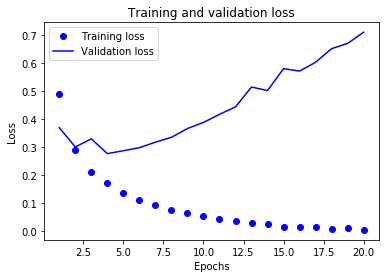

In [36]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

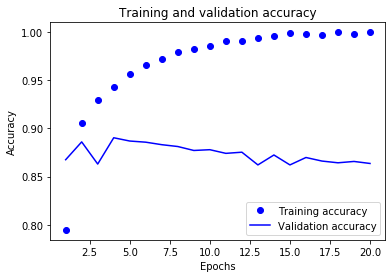

In [38]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

In [39]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [41]:
model.compile(optimizer = 'rmsprop',
             loss='binary_crossentropy',
             metrics = ['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 117us/sample - loss: 0.5217 - accuracy: 0.7823 - val_loss: 0.3871 - val_accuracy: 0.8710
Epoch 2/4
15000/15000 [==============================] - 1s 82us/sample - loss: 0.3034 - accuracy: 0.9065 - val_loss: 0.3180 - val_accuracy: 0.8799
Epoch 3/4
15000/15000 [==============================] - 1s 83us/sample - loss: 0.2194 - accuracy: 0.9323 - val_loss: 0.3186 - val_accuracy: 0.8707
Epoch 4/4
15000/15000 [==============================] - 1s 84us/sample - loss: 0.1741 - accuracy: 0.9434 - val_loss: 0.2914 - val_accuracy: 0.8842


In [42]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

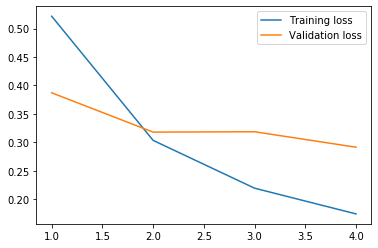

In [46]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, label='Training loss')
plt.plot(epochs, val_loss_values, label='Validation loss')
plt.legend()
plt.show();

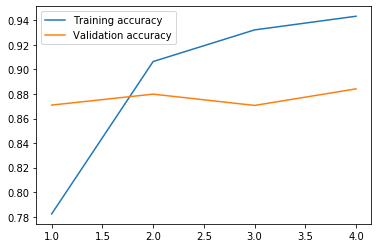

In [48]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, label='Training accuracy')
plt.plot(epochs, val_acc_values, label='Validation accuracy')
plt.legend()
plt.show();

In [49]:
results = model.evaluate(x_test, y_test)
results

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.307429399766922, 0.87564]

In [54]:
model.predict(x_test)

array([[0.34582   ],
       [0.99967575],
       [0.9869336 ],
       ...,
       [0.13377222],
       [0.27364743],
       [0.7516826 ]], dtype=float32)

In [55]:
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)